In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pso import ParticleSwarmOptimization,Params
import numpy as np

In [ ]:
state_map = {
 0: 'AC',
 1: 'AL',
 2: 'AP',
 3: 'AM',
 4: 'BA',
 5: 'CE',
 6: 'DF',
 7: 'ES',
 8: 'GO',
 9: 'MA',
 10: 'MT',
 11: 'MS',
 12: 'MG',
 13: 'PA',
 14: 'PB',
 15: 'PR',
 16: 'PE',
 17: 'PI',
 18: 'RJ',
 19: 'RN',
 20: 'RS',
 21: 'RO',
 22: 'RR',
 23: 'SC',
 24: 'SP',
 25: 'SE',
 26: 'TO'
}

brazil=nx.Graph()
brazil.add_nodes_from(list(range(27)))

edges = [
        (0, 3),
        (0, 21),
        (1, 4),
        (1, 16),
        (1, 25),
        (2, 13),
        (3, 22),
        (3, 13),
        (3, 21),
        (4, 7),
        (4, 8),
        (4, 12),
        (4, 16),
        (4, 17),
        (4, 25),
        (4, 26),
        (5, 14),
        (5, 16),
        (5, 17),
        (5, 19),
        (6, 8),
        (6, 12),
        (7, 12),
        (7,18),
        (8, 10),
        (8, 12),
        (8, 26),
        (9, 13),
        (9, 17),
        (9, 26),
        (10, 11),
        (10, 13),
        (10, 21),
        (10, 26),
        (11, 12),
        (11, 15),
        (11, 24),
        (12, 18),
        (12, 24),
        (13, 22),
        (13, 26),
        (14, 19),
        (14,16),
        (15, 23),
        (15, 24),
        (16, 17),
        (17, 26),
        (18, 24),
        (20, 23),
        (23, 20)
    ]

brazil.add_edges_from(edges)

In [ ]:

def quality_function(x:np.ndarray,graph:nx.Graph):
    # here the score is defined by the number of edges which ends have different collors, summed by a multiple of the distance between the color array and
    # the position that is representing it (in order to make this problem continuous instead of discrete)
    d=np.round(x).astype(int)
    score=0
    for a in range(len(d)):
        neighbors=[i for i in graph.neighbors(a)]
        for v in neighbors:
            if d[a]!=d[v]:
                score+=1
    return score/2-np.linalg.norm(x-d)*0.1


# Defining hyperparameters for the algorithm
hyperparams = Params()
hyperparams.num_particles = 100
hyperparams.inertia_weight = 0.7
hyperparams.cognitive_parameter = 0.6
hyperparams.social_parameter = 0.8
# Defining the lower and upper bounds
lower_bound = np.array([-0.499999]*27)
upper_bound = np.array([3.4999999]*27)
pso = ParticleSwarmOptimization(hyperparams, lower_bound, upper_bound)
position_history = []
quality_history = []
# Number of function evaluations will be 1000 times the number of particles,
# i.e. PSO will be executed by 1000 generations
num_evaluations = 1000 * hyperparams.num_particles
for i in range(num_evaluations):
    position = pso.get_position_to_evaluate()
    value = quality_function(position,brazil)
    pso.notify_evaluation(value)
    position_history.append(position)
    quality_history.append(value)

In [174]:
final_color=np.round(pso.get_best_position()).astype(int)
quality_function(final_color,brazil)

48.0

In [ ]:

color_dict={
    0: 'red',
    1: 'blue',
    2: 'black',
    3: 'green',
}
colors=[color_dict[i] for i in final_color]

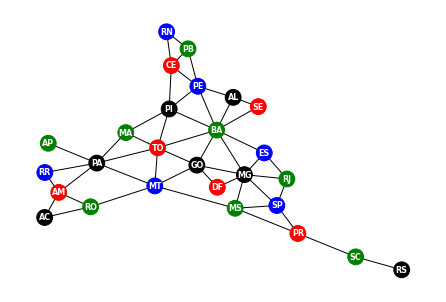

In [181]:
nx.draw(brazil, with_labels=True, labels=state_map,node_color=colors, node_size=250, font_weight='bold', font_color='white', font_size=8)